In [40]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import torch.nn as nn

torch.manual_seed(123)

In [41]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.Softmax(dim=-1)
)

In [42]:
train_dataset = datasets.MNIST(
    root="./data", train=True, download=True, transform=transforms.ToTensor()
)
test_dataset = datasets.MNIST(
    root="./data", train=False, download=True, transform=transforms.ToTensor()
)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [43]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    for batch, (X, y) in enumerate(dataloader):
        X = X.to("mps")
        y = y.to("mps")

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * 64 + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [44]:
# Step 3: Define the evaluation metric
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [45]:

def testing_loop(dataloader, model):
    # Step 4: Evaluate the model on the test set
    total_accuracy = 0
    total_samples = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to("mps"), labels.to("mps")

            outputs = model(images)
            total_accuracy += accuracy(outputs, labels) * images.size(0)
            total_samples += images.size(0)

    print(f"Accuracy: {total_accuracy/total_samples}")

In [46]:
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters())

model = model.to("mps")
loss = loss.to("mps")
model.train()

for t in range(5):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model, loss, optim)
    testing_loop(test_loader, model)

Epoch 1
-------------------------------
loss: 2.301933  [   64/60000]
loss: 1.659880  [ 6464/60000]
loss: 1.649729  [12864/60000]
loss: 1.583541  [19264/60000]
loss: 1.656278  [25664/60000]
loss: 1.575230  [32064/60000]
loss: 1.691150  [38464/60000]
loss: 1.551231  [44864/60000]
loss: 1.565714  [51264/60000]
loss: 1.552674  [57664/60000]
Accuracy: 0.916100025177002
Epoch 2
-------------------------------
loss: 1.529373  [   64/60000]
loss: 1.512843  [ 6464/60000]
loss: 1.567832  [12864/60000]
loss: 1.514372  [19264/60000]
loss: 1.507453  [25664/60000]
loss: 1.569365  [32064/60000]
loss: 1.498040  [38464/60000]
loss: 1.492977  [44864/60000]
loss: 1.492941  [51264/60000]
loss: 1.514031  [57664/60000]
Accuracy: 0.9503999948501587
Epoch 3
-------------------------------
loss: 1.512353  [   64/60000]
loss: 1.500756  [ 6464/60000]
loss: 1.520612  [12864/60000]
loss: 1.502595  [19264/60000]
loss: 1.498765  [25664/60000]
loss: 1.507863  [32064/60000]
loss: 1.497060  [38464/60000]
loss: 1.47396

tensor([[    0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             1.0000,     0.0000,     0.0000,     0.0000]],
       grad_fn=<SoftmaxBackward0>)

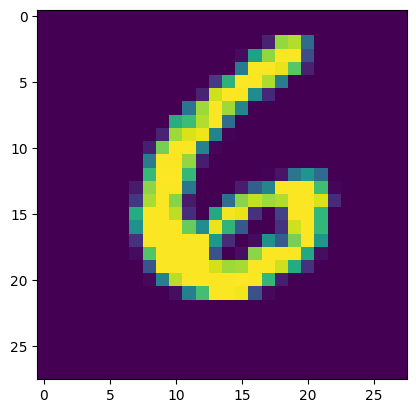

In [47]:
i = 90
data = train_dataset[i]
plt.imshow(data[0].reshape((28, 28, 1)))
data[1]

torch.set_printoptions(sci_mode=False)
model.to("cpu")(data[0])